In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-classification-dataset-csv/emails.csv


In [14]:
df = pd.read_csv("/kaggle/input/email-spam-classification-dataset-csv/emails.csv")

In [15]:
df.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.tail(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5162,Email 5163,2,3,1,2,1,2,32,0,0,...,0,0,0,0,0,0,0,0,0,1
5163,Email 5164,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5164,Email 5165,21,18,3,1,6,4,106,1,2,...,0,0,0,0,0,0,0,0,0,0
5165,Email 5166,1,0,1,0,3,1,12,1,0,...,0,0,0,1,0,0,0,0,0,0
5166,Email 5167,1,0,1,1,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.shape

(5172, 3002)

In [18]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [19]:
df.describe().columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3001)

In [20]:
df.drop(columns=['Email No.'],inplace=True)

In [42]:
df.corr()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.00,0.85,0.34,0.84,0.78,0.80,0.78,0.47,0.30,0.85,...,0.01,0.08,0.23,0.22,0.10,0.13,0.13,0.34,0.05,-0.00
to,0.85,1.00,0.38,0.83,0.78,0.75,0.90,0.51,0.35,0.88,...,0.01,0.10,0.23,0.26,0.09,0.09,0.12,0.41,0.07,0.06
ect,0.34,0.38,1.00,0.27,0.37,0.18,0.40,0.16,0.97,0.30,...,0.13,0.03,0.05,0.06,0.00,-0.01,0.00,0.14,0.00,-0.12
and,0.84,0.83,0.27,1.00,0.75,0.81,0.82,0.48,0.24,0.87,...,0.01,0.10,0.27,0.25,0.15,0.08,0.12,0.40,0.04,0.11
for,0.78,0.78,0.37,0.75,1.00,0.68,0.74,0.50,0.33,0.76,...,0.02,0.04,0.24,0.21,0.13,0.07,0.12,0.30,0.04,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.13,0.09,-0.01,0.08,0.07,0.07,0.11,0.01,0.01,0.12,...,-0.00,-0.00,0.04,0.10,0.04,1.00,0.06,0.05,0.01,0.06
allowing,0.13,0.12,0.00,0.12,0.12,0.11,0.11,0.08,-0.00,0.14,...,-0.00,-0.00,-0.01,0.02,0.28,0.06,1.00,0.10,-0.00,0.01
ff,0.34,0.41,0.14,0.40,0.30,0.44,0.46,0.20,0.11,0.45,...,0.01,0.07,0.13,0.16,0.11,0.05,0.10,1.00,0.05,0.14
dry,0.05,0.07,0.00,0.04,0.04,0.03,0.09,0.03,0.00,0.08,...,-0.00,0.04,-0.01,0.02,-0.00,0.01,-0.00,0.05,1.00,-0.01


In [21]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


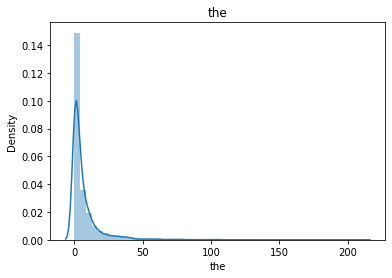

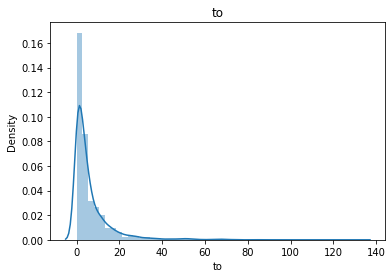

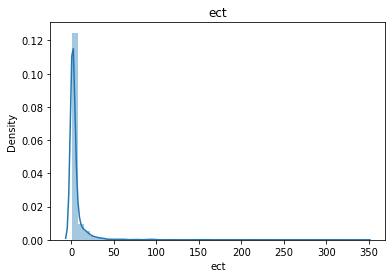

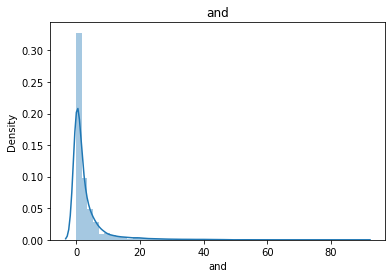

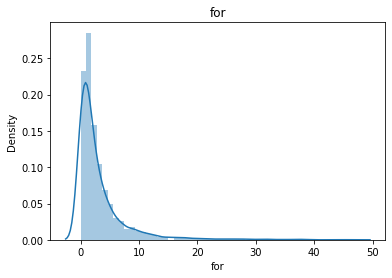

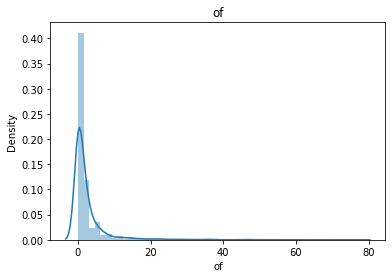

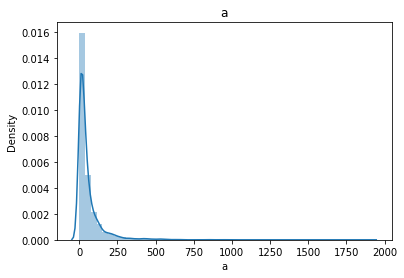

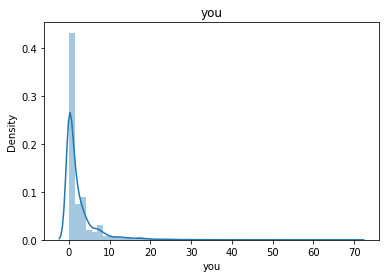

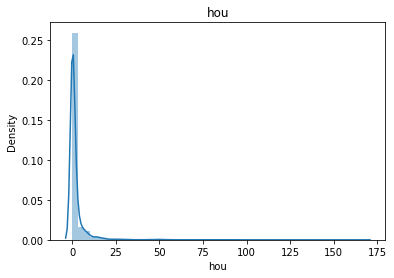

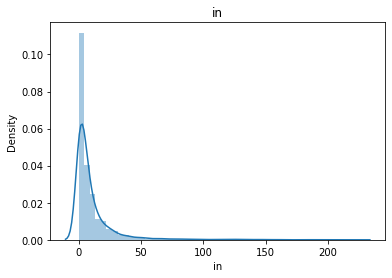

In [57]:
import matplotlib.pyplot as plt
for i in df.columns[:10] :
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

In [22]:
X=df.drop(['Prediction'], axis=1)
Y = df['Prediction']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.8628019323671497

<AxesSubplot:>

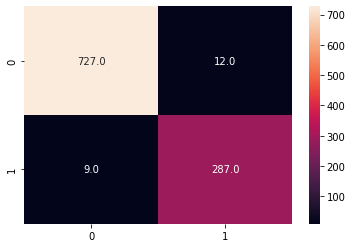

In [32]:
from sklearn.metrics import confusion_matrix

knn_corr=confusion_matrix(y_test, y_pred)
sns.heatmap(knn_corr,annot=True, fmt= '.1f')

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=500,random_state = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.9884057971014493

<AxesSubplot:>

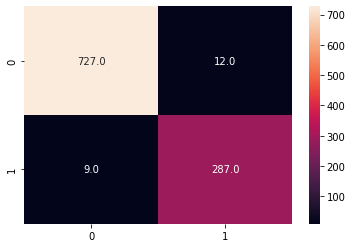

In [33]:
from sklearn.metrics import confusion_matrix

knn_corr=confusion_matrix(y_test, y_pred)
sns.heatmap(knn_corr,annot=True, fmt= '.1f')

In [51]:
from sklearn.model_selection import GridSearchCV 

knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,6,7,8,9]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 4, )
best_clf = clf_knn.fit(X_train,y_train)
print(best_clf.best_params_)
print(best_clf.best_score_)

{'n_neighbors': 8}
0.8672952933591231


In [54]:
clf= ExtraTreesClassifier(random_state = 1)
param_grid =  {'n_estimators':[500],'max_depth': range(12, 24, 3), 'min_samples_split': range(3, 13, 2)}
                                  
clf_rf = GridSearchCV(clf, param_grid = param_grid, cv = 4, verbose = True, n_jobs = -1)
best_clf = clf_rf.fit(X_train,y_train)
best_clf.best_params_

Fitting 4 folds for each of 20 candidates, totalling 80 fits


{'max_depth': 21, 'min_samples_split': 3, 'n_estimators': 500}

In [55]:
best_clf.best_score_

0.9100783505732626